# Exercise: Data Analysis, Visualization, and Neural Network Training on the Titanic Dataset
This notebook contains tasks that will guide you through the process of working with the Titanic dataset.
You will load, understand, analyze, clean, visualize, and prepare the dataset for training a neural network.
Finally, you will push your code to GitHub.


## Task 1: Load the Dataset
**Task:** Load the Titanic dataset into a Pandas DataFrame.


In [55]:
# Import libraries
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset into a Pandas DataFrame
file_path = "/content/drive/MyDrive/Colab/8-2-2025/train.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

## Task 2: Understand the Dataset
**Task:** Display basic information about the dataset such as shape, data types, and summary statistics.

In [56]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nData types:")
print(df.dtypes)

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Shape of the dataset: (891, 12)

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            P

In [57]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values (example: fill missing 'Age' values with the median)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop rows with missing 'Embarked' values (or handle them differently)
df = df.dropna(subset=['Embarked'])

# Confirm no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Number of duplicate rows: 0

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Task 3: Clean the Dataset
**Task:** Check for missing values, duplicates, and perform any necessary preprocessing.


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'])

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encode 'Sex'
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # Encode 'Embarked'

# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop the 'Cabin' column due to high percentage of missing values
df = df.drop(columns=['Cabin'])

# Fill missing 'Embarked' values with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Task 4: Visualize the Dataset
**Task:** Create visualizations to better understand the data.

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

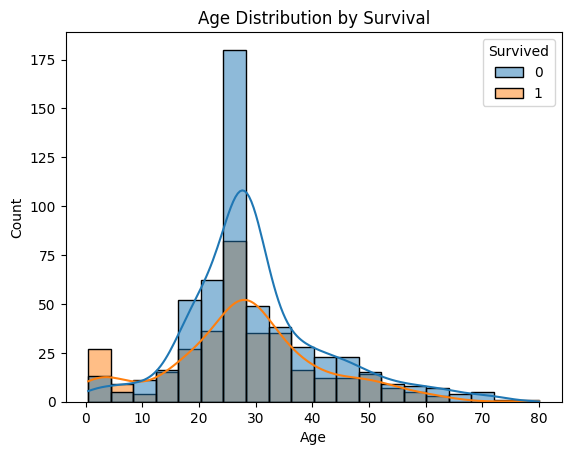

In [61]:
#توزيع الأعمار
# Visualize age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=20)
plt.title("Age Distribution by Survival")
plt.show()


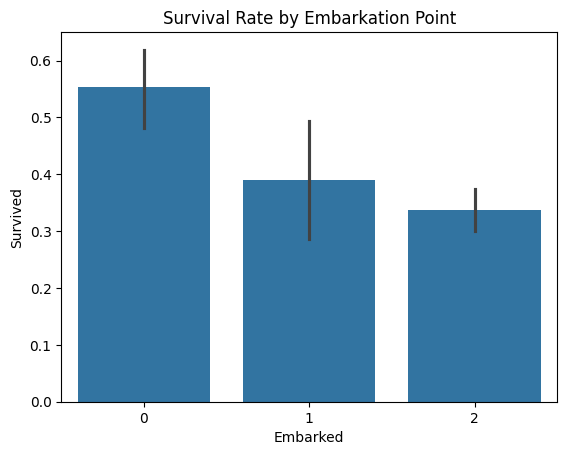

In [24]:
#معدل البقاء حسب ميناء الصعود
# Visualize survival rate by embarkation point
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Point")
plt.show()


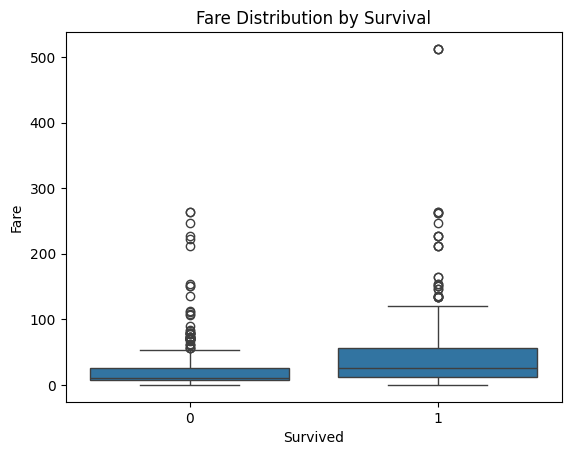

In [26]:
#العلاقة بين تكلفة التذكرة وفرص البقاء
# Visualize fare distribution by survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()


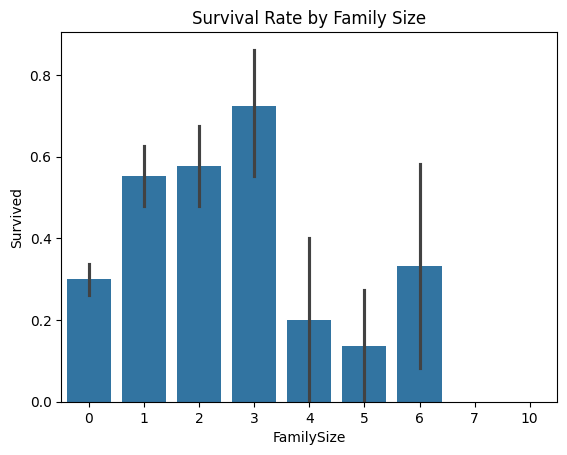

In [27]:
#العلاقة بين عدد أفراد الأسرة وفرص البقاء
# Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch']

# Visualize survival rate by family size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


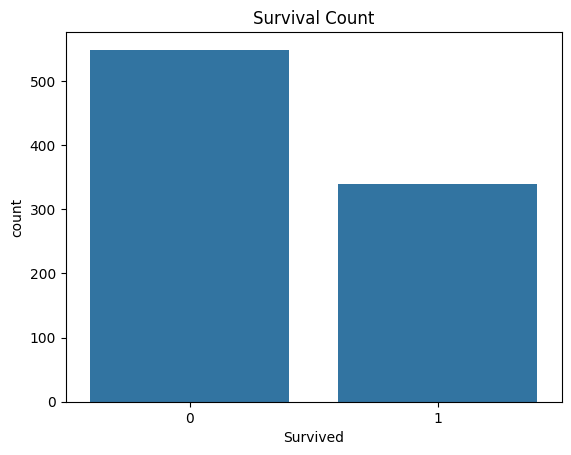

In [21]:
#عدد الناجين
# Visualize the survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

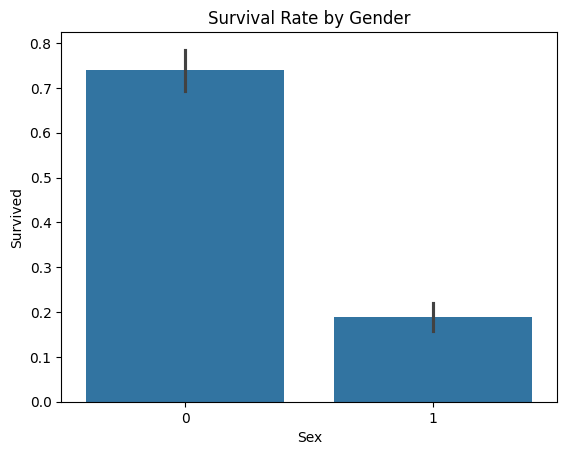

In [22]:
#الناجين حسب الجنس
# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


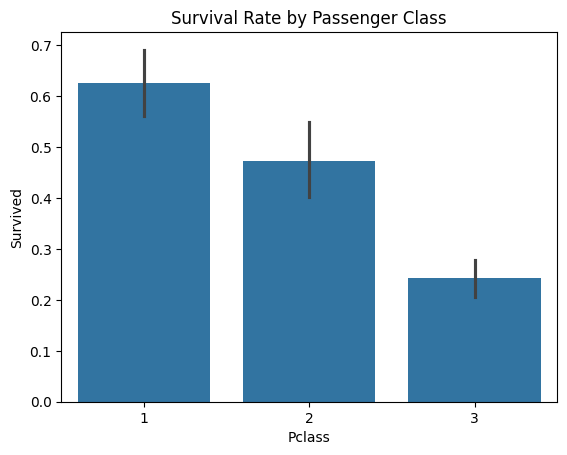

In [23]:
#الناجين حسب فئة الركاب
# Visualize survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

## Task 5: Prepare the Dataset for Neural Network Training
**Task:** Encode categorical variables, split the dataset into training and testing sets, and normalize the features.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encode 'Sex'
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # Encode 'Embarked'

# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (711, 7)
Testing features shape: (178, 7)
Training target shape: (711,)
Testing target shape: (178,)


## Task 6: Train and Evaluate a Neural Network
**Task:** Train a simple neural network on the dataset and evaluate its accuracy.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6536 - loss: 0.6880 - val_accuracy: 0.7416 - val_loss: 0.6373
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7167 - loss: 0.6315 - val_accuracy: 0.7809 - val_loss: 0.5922
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7835 - loss: 0.5796 - val_accuracy: 0.7865 - val_loss: 0.5473
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7802 - loss: 0.5473 - val_accuracy: 0.7978 - val_loss: 0.5081
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7795 - loss: 0.5190 - val_accuracy: 0.8034 - val_loss: 0.4780
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8094 - loss: 0.4751 - val_accuracy: 0.7978 - val_loss: 0.4624
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7983 - loss: 0.4563 - val_accuracy: 0.8034 - val_loss: 0.4535
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8093 - loss: 0.4384 - val_accuracy: 0.7978 - val_loss: 0.4504
Epo

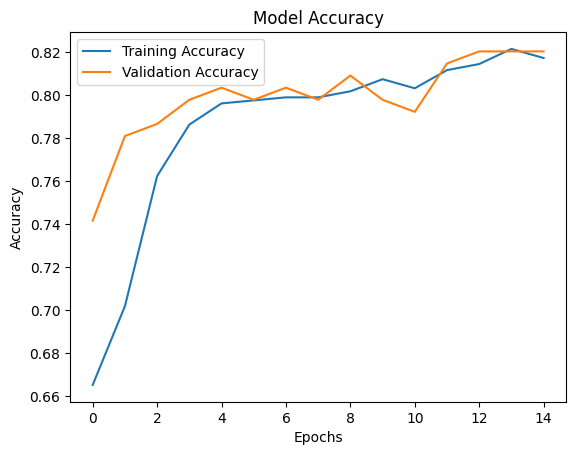

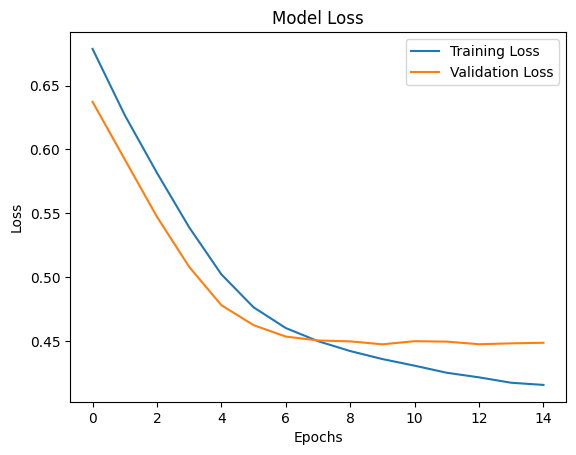

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Task 7: Create a Git Repository and Push the Code
**Task:** Initialize a Git repository, add the project files, commit the changes, and push the code to a GitHub repository.


In [67]:
!ls /content/drive/MyDrive/Colab/8-2-2025/
!cd /content/drive/MyDrive/Colab/8-2-2025/

!echo "*.gslides" >> .gitignore
!echo "*.ipynb_checkpoints/" >> .gitignore
!git rm -r --cached .
!git add .
!git commit -m "Clean up untracked files"


'Final project.ipynb'   train.csv
fatal: pathspec '.' did not match any files
error: open("drive/MyDrive/الاحتياجات.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/الاحتياجات.gdoc'
fatal: adding files failed
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	.gitignore
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [66]:
!echo "*.gsheet" > .gitignore

# Initialize a Git repository
!git init
!git branch -M main

# Add files to the repository
!git add .

!git config --global user.name "Hamzeh Jaber"
!git config --global user.email "LionAlquds@gmail.com"

# Commit the changes
!git commit -m "Initial commit for Titanic dataset project"

# Add the remote repository (replace URL with your GitHub repo link)
!git remote add origin https://github.com/LionAlquds/titanic-neural-network.git

# Push the code
!git push -u origin main


Reinitialized existing Git repository in /content/.git/
error: open("drive/MyDrive/Session 3 | Personal Branding.gslides"): Operation not supported
error: unable to index file 'drive/MyDrive/Session 3 | Personal Branding.gslides'
fatal: adding files failed
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	.gitignore
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/LionAlquds/titanic-neural-network.git'
